# Netflix Data Mastery: Cleaning, Analysis & Visual Insights with Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
df.shape

(6234, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [6]:
# Checking null values
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
# Checking NaN values
df.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
# Checking duplicates
df.duplicated().sum()

0

###  Basic Exploration & Cleaning

In [9]:
#  How many unique countries are represented?
df['country'].nunique()

554

In [10]:
# How many shows are Movies vs. TV Shows?

df['type'].value_counts()

type
Movie      4265
TV Show    1969
Name: count, dtype: int64

In [11]:

# Find the most common genre.

df['listed_in'].value_counts().idxmax()



'Documentaries'

In [12]:
# Clean the date_added column and convert to datetime.
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')
df['date_added']

0      2019-09-09
1      2016-09-09
2      2018-09-08
3      2018-09-08
4      2017-09-08
          ...    
6229          NaT
6230          NaT
6231          NaT
6232          NaT
6233          NaT
Name: date_added, Length: 6234, dtype: datetime64[ns]

In [13]:
# Create Year_Added and Month_Added columns.

df['Year_added']=df['date_added'].dt.year.astype('Int64')
df['Month_added']=df['date_added'].dt.month_name()
df.sample(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added,Month_added
962,80162246,Movie,Verónica,"Carlos Algara, Alejandro Martinez-Beltran","Arcelia Ramírez, Olga Segura, Sofía Garza",Mexico,2017-10-01,2017,TV-MA,81 min,"Dramas, Independent Movies, International Movies",A reclusive psychologist agrees to treat a pat...,2017,October
4709,80134797,TV Show,Merlí,NaN,"Francesc Orella, David Solans, Candela Antón, ...",Spain,2016-12-01,2015,TV-MA,1 Season,"International TV Shows, TV Dramas, Teen TV Shows",An unconventional high school philosophy teach...,2016,December
5047,80223371,Movie,The Guernsey Literary and Potato Peel Pie Society,Mike Newell,"Lily James, Michiel Huisman, Penelope Wilton, ...","United Kingdom, France, United States",2018-08-10,2018,TV-14,124 min,"Dramas, Romantic Movies",A London writer bonds with the colorful reside...,2018,August


In [14]:
# Drop rows with missing type or release_year.

df.dropna(subset=['type','release_year'],inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added,Month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,September
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,September
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,September
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,September
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",<NA>,NaN
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",<NA>,NaN
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaT,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...,<NA>,NaN
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",<NA>,NaN


### Pivot Tables & Aggregation

In [15]:
# Create a pivot table: count of shows by type and release year.
pivot_type_year=df.pivot_table(index='release_year',columns='type',aggfunc='size',fill_value=0)
pivot_type_year.head()

type,Movie,TV Show
release_year,,
1925,0,1
1942,2,0
1943,3,0
1944,3,0
1945,3,0


In [16]:
#Create a pivot: average duration (in minutes) by genre.

df['duration'].unique()

array(['90 min', '94 min', '1 Season', '99 min', '110 min', '60 min',
       '78 min', '95 min', '58 min', '62 min', '65 min', '61 min',
       '135 min', '98 min', '96 min', '79 min', '113 min', '80 min',
       '77 min', '112 min', '106 min', '102 min', '114 min', '125 min',
       '142 min', '133 min', '100 min', '86 min', '146 min', '10 min',
       '122 min', '126 min', '116 min', '130 min', '70 min', '128 min',
       '88 min', '108 min', '93 min', '64 min', '107 min', '92 min',
       '111 min', '103 min', '40 min', '85 min', '72 min', '45 min',
       '89 min', '24 min', '127 min', '163 min', '117 min', '42 min',
       '104 min', '75 min', '82 min', '38 min', '97 min', '81 min',
       '91 min', '152 min', '87 min', '121 min', '101 min', '119 min',
       '83 min', '182 min', '124 min', '63 min', '139 min', '171 min',
       '84 min', '69 min', '76 min', '41 min', '153 min', '141 min',
       '52 min', '137 min', '132 min', '157 min', '109 min', '105 min',
       '25 min', '71

In [17]:
# Filter movies and extract numeric minutes

df_movies=df[df['type']=='Movie'].copy()

In [18]:
df_movies['Duration_in_minutes']=df_movies['duration'].str.extract(r'(\d+)').astype(float)

df_movies['Duration_in_minutes']


0        90.0
1        94.0
4        99.0
6       110.0
7        60.0
        ...  
5577     70.0
5578    102.0
5579     88.0
5580    109.0
6231     60.0
Name: Duration_in_minutes, Length: 4265, dtype: float64

✅ df_movies['duration'].str.extract('(\d+)')


.str.extract() is used with regular expressions to pull out matching text from strings.

'(\d+)' is a regular expression (regex):

\d means any digit (0–9)

+ means 1 or more times

So \d+ matches numbers like "90", "1", "123" etc.

The parentheses () indicate a capturing group, which tells pandas to return the matched digits


r'(\d+)' is a raw string — it tells Python not to interpret backslashes, so \d is passed directly to the regex engine as "match a digit."

In [19]:
df_movies['listed_in'].str.split(',')[0]

['Children & Family Movies', ' Comedies']

In [20]:
# Average duration by genre (first genre only)
df_movies['main_genre'] = df_movies['listed_in'].str.split(',').str[0]
pivot_duration_genre = df_movies.pivot_table(index='main_genre', values='Duration_in_minutes', aggfunc='mean').sort_values(by='Duration_in_minutes', ascending=False)
pivot_duration_genre.head()

,Duration_in_minutes
main_genre,
Action & Adventure,113.984925
Dramas,112.558960
International Movies,110.552941
Classic Movies,109.887097
Sci-Fi & Fantasy,108.900000


In [21]:
# How many movies released each year? Use pivot with plot.
# movie_count=df[df['type']=='Movie'].groupby('release_year').size()

movie_pivot = df[df['type'] == 'Movie'].pivot_table(
    index='release_year',
    values='title',  # any column, since we're just counting
    aggfunc='count'
)

movie_pivot


,title
release_year,
1942,2
1943,3
1944,3
1945,3
1946,2
...,...
2016,593
2017,682
2018,646


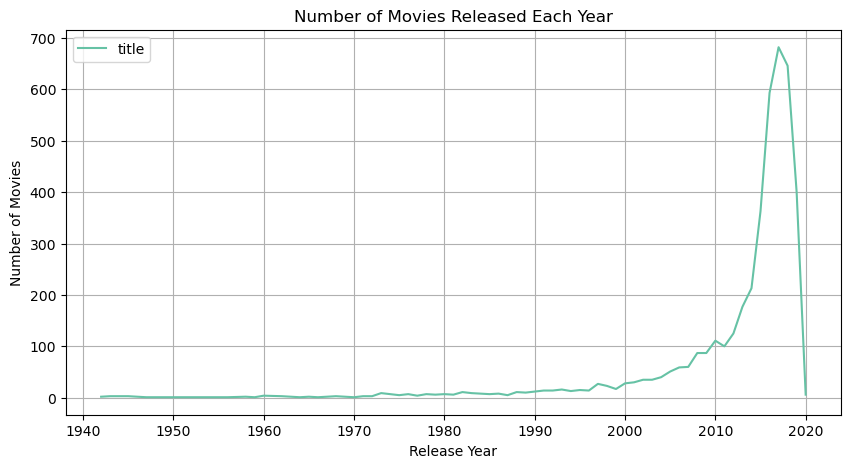

In [22]:
# Plot the pivot table
movie_pivot.plot(kind='line', figsize=(10,5), title='Number of Movies Released Each Year',colormap='Set2')
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

## 📈 Insights from "Number of Movies Released Each Year" Chart

### 1. 📉 Minimal Releases Before 2000
- From **1940 to 2000**, the number of movies released each year remained relatively low.
- Most years saw **fewer than 50 movies**, indicating the limited production capacity and traditional distribution channels of the time.

### 2. 📈 Steady Growth Post-2000
- Starting around **2005**, there's a noticeable rise in the number of movies released.
- This period marks the early influence of **digital technology** and **online streaming platforms**.

### 3. 🚀 Peak Around 2018–2019
- The movie count **peaks around 2018–2019**, with nearly **700 releases in a single year**.
- Possible reasons:
  - Surge in demand for **original content** from streaming services like Netflix.
  - Lower production and distribution costs due to digital transformation.

### 4. ⛔ Sudden Drop in 2020
- A **sharp decline in 2020** is visible — likely due to the **COVID-19 pandemic**.
  - Film shoots halted.
  - Theaters closed.
  - Releases postponed or canceled.

---

### 🎯 Summary
> The chart reflects how the digital revolution reshaped the film industry post-2000, leading to a content explosion that was dramatically halted by the global pandemic in 2020.


In [23]:
# Count shows added each year by type.
df.groupby(['Year_added', 'type']).size()

Year_added  type   
2008        Movie         1
            TV Show       1
2009        Movie         2
2010        Movie         1
2011        Movie        13
2012        Movie         4
            TV Show       3
2013        Movie         6
            TV Show       3
2014        Movie        19
2015        Movie        58
            TV Show      16
2016        Movie       264
            TV Show     148
2017        Movie       913
            TV Show     271
2018        Movie      1290
            TV Show     339
2019        Movie      1546
            TV Show     511
2020        Movie       147
            TV Show      27
dtype: int64

In [24]:

df.groupby(['Year_added', 'type']).size().unstack(fill_value=0)

type,Movie,TV Show
Year_added,,
2008,1,1
2009,2,0
2010,1,0
2011,13,0
2012,4,3
2013,6,3
2014,19,0
2015,58,16
2016,264,148


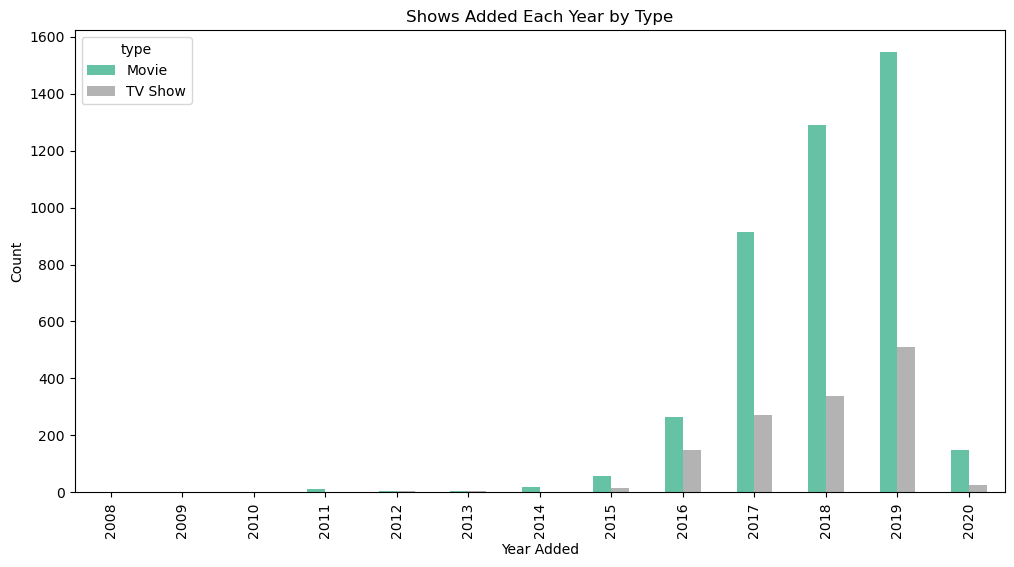

In [25]:
df.groupby(['Year_added', 'type']).size().unstack().plot(kind='bar', figsize=(12, 6), title='Shows Added Each Year by Type',colormap='Set2')
plt.ylabel('Count')
plt.xlabel('Year Added')
plt.show()

### 📊 Insights: Shows Added Each Year by Type

1. **Massive Growth After 2016**  
   - A significant increase in both **Movies** and **TV Shows** added to Netflix began in **2016**.
   - This reflects a strong content expansion phase.

2. **Peak Year – 2019**  
   - The **highest number of shows** were added in **2019**, especially **Movies** (~1550).
   - **TV Shows** also peaked (~800), showing a dual focus on content types.

3. **Movies Consistently Dominate**  
   - Every year, **Movies outnumber TV Shows**, highlighting Netflix's heavier focus on expanding its movie catalog.

4. **Steady Growth (2015–2018)**  
   - Gradual increase in new additions each year suggests sustained investment in content acquisition and production.

5. **Noticeable Drop in 2020**  
   - There is a sharp decline in both content types in **2020**, likely due to the **COVID-19 pandemic** affecting production schedules.

---

###  Business Takeaways

- **Content Strategy Shift**: Post-2016 marks an aggressive content growth period, likely to maintain competitive edge.
- **Audience Retention Focus**: The increase in new titles could be aimed at improving user engagement and subscription retention.
- **Pandemic Disruption**: 2020 highlights the impact of global events on digital content platforms.


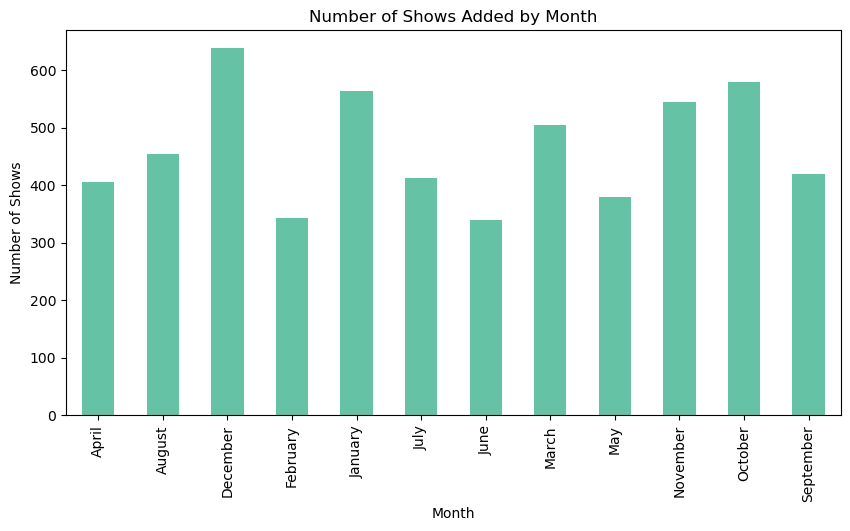

In [26]:
# What month sees the most new releases? Pivot and plot.
df.groupby('Month_added').size().plot(kind='bar', figsize=(10,5), title='Number of Shows Added by Month',colormap='Set2')
plt.xlabel("Month")
plt.ylabel("Number of Shows")
plt.show()


In [27]:

monthly_type_counts=df.groupby(['Month_added','type']).size().unstack()

month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
monthly_type_counts = monthly_type_counts.reindex(month_order)

<Figure size 1200x1000 with 0 Axes>

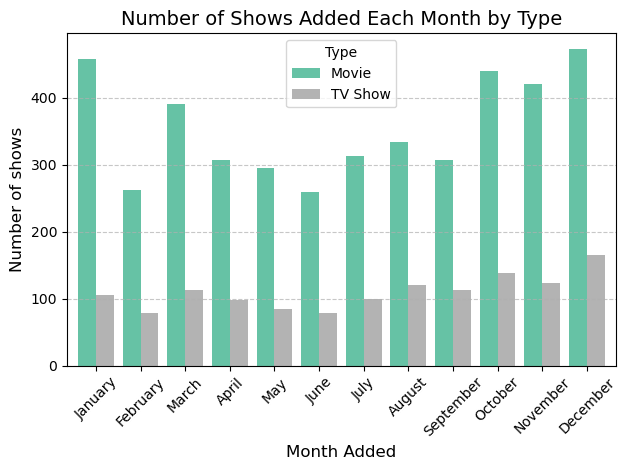

In [28]:
plt.figure(figsize=(12,10))
monthly_type_counts.plot(kind='bar', stacked=False, colormap='Set2', width=0.8)

plt.title('Number of Shows Added Each Month by Type', fontsize=14)
plt.xlabel('Month Added', fontsize=12)
plt.ylabel('Number of shows', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Netflix Content Addition Trends by Month and Type

### 🔹 1. Number of Shows Added by Month

- **December, October, and January** show a significant spike in the number of shows added.
  - These months might be targeted to align with holiday seasons, boosting content availability.
  
- **February and June** observe relatively lower additions compared to other months.

### 🔹 2. Number of Shows Added Each Month by Type

- **Movies** dominate every month compared to **TV Shows**.
  - **December** sees the highest number of movies (~470) and TV Shows (~225) added.
  
- **TV Show additions** remain more consistent, while **movie additions** fluctuate more.
  
- Notable **movie addition spikes** are observed in January, March, October, and December.

- **TV Shows** have comparatively modest variation month-over-month.

### 🔍 Key Insights

- **Strategic Content Drops**: Netflix appears to release more content towards the end and beginning of the year, potentially to capitalize on increased viewership during holidays and New Year.

- **Movie-Heavy Platform**: A clear emphasis on movie additions each month suggests a strategy of refreshing its movie library frequently.

- **Consistent TV Show Release**: The steady TV show addition pattern suggests Netflix maintains a regular schedule, possibly to retain ongoing subscribers with episodic content.


In [29]:
# Show top 10 countries with most content.

df['country'].value_counts().head(10)

country
United States     2032
India              777
United Kingdom     348
Japan              176
Canada             141
South Korea        136
Spain              117
France              90
Mexico              83
Turkey              79
Name: count, dtype: int64

In [30]:
# Top 5 directors with most content—pivot or value_counts.

df['director'].value_counts().head(5)

director
Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Jay Chapman               12
Steven Spielberg           9
Name: count, dtype: int64

In [31]:
# using pivottable 

df.pivot_table(index='director',aggfunc='size').sort_values(ascending=False).head(5)

director
Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Jay Chapman               12
Steven Spielberg           9
dtype: int64

In [32]:
# Show average release year of TV shows vs Movies.

df.groupby('type')['release_year'].mean()



type
Movie      2012.354279
TV Show    2015.536313
Name: release_year, dtype: float64

###  Plotting with Pandas

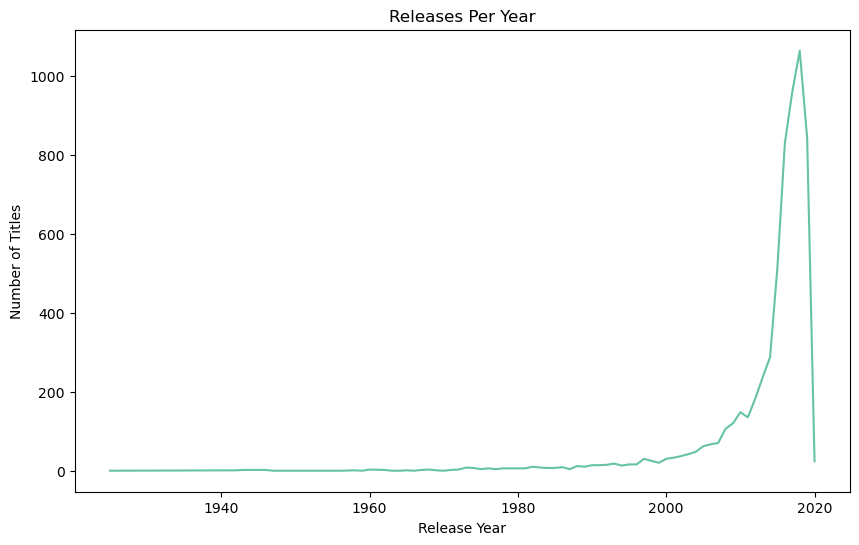

In [33]:
# Plot number of releases per year (line plot).
df['release_year'].value_counts().sort_index().plot(kind='line',figsize=(10,6),title='Releases Per Year',colormap='Set2')
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()


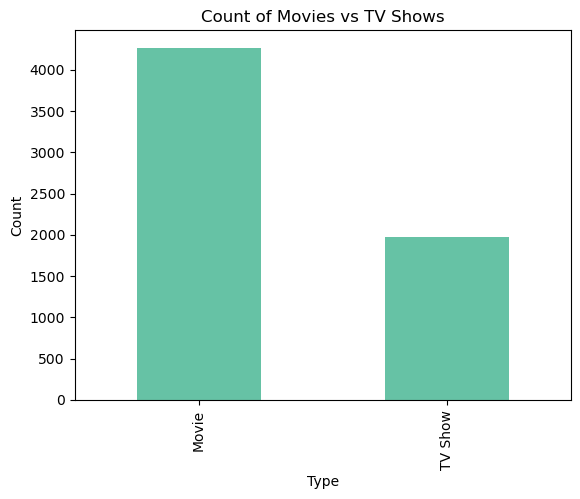

In [34]:
# Bar chart: count of Movies vs TV Shows.

df['type'].value_counts().plot(kind='bar', title='Count of Movies vs TV Shows', colormap='Set2')
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

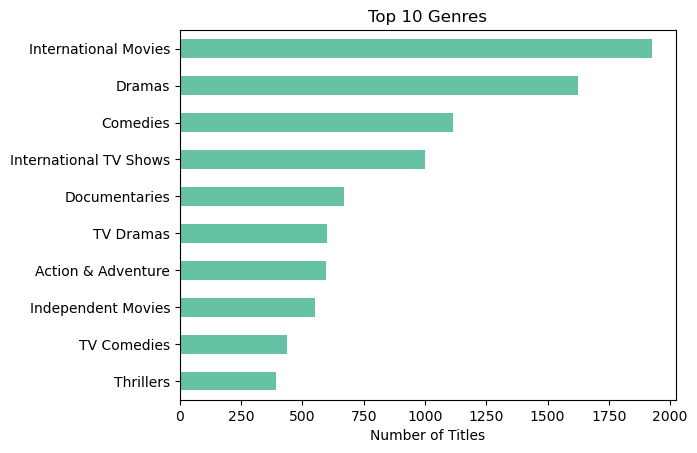

In [35]:
# Horizontal bar chart: Top 10 genres.

df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10).plot(kind='barh', title='Top 10 Genres',colormap='Set2')
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()
plt.show()

🔹 What this does:
df['listed_in']: Refers to a column in the DataFrame df that contains genres as a comma-separated string (like "Dramas, International Movies").

.str.split(', ', expand=True):

Splits the string at each comma and space (, ) into multiple columns.

expand=True turns the result into a DataFrame where each genre becomes a separate column.

🔹 What this does:

plt.gca() gets the current axes object (used to customize the plot).

.invert_yaxis() flips the y-axis so that the genre with the highest count appears at the top of the plot instead of the bottom.

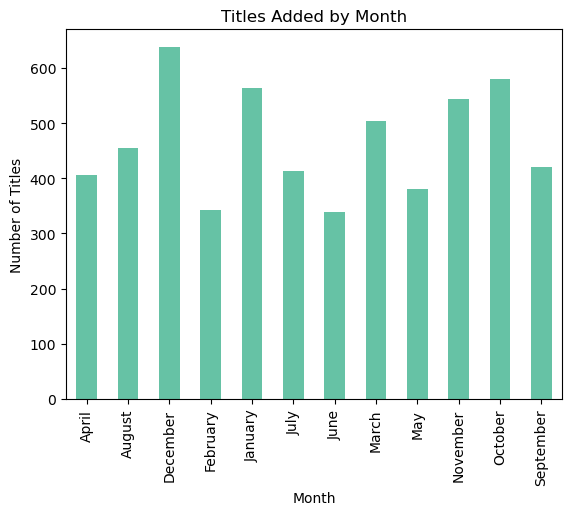

In [36]:
#Plot shows added per month (bar).

df['Month_added'].value_counts().sort_index().plot(kind='bar', title='Titles Added by Month',colormap='Set2')
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.show()

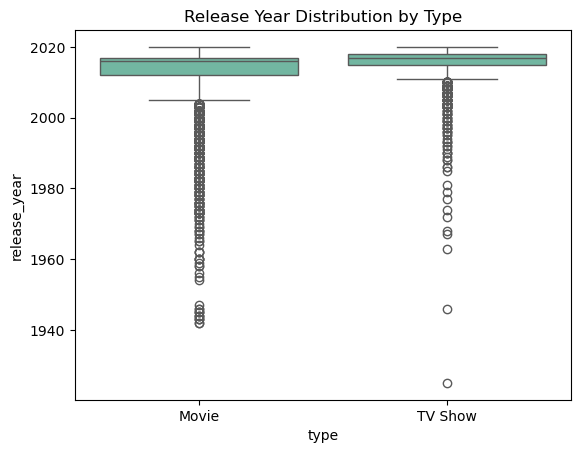

In [37]:
# Box plot: release year distribution by content type.

sns.set_palette("Set2")
sns.boxplot(data=df, x='type', y='release_year')
plt.title("Release Year Distribution by Type")
plt.show()

Text(158.22222222222223, 0.5, 'Month Added ')

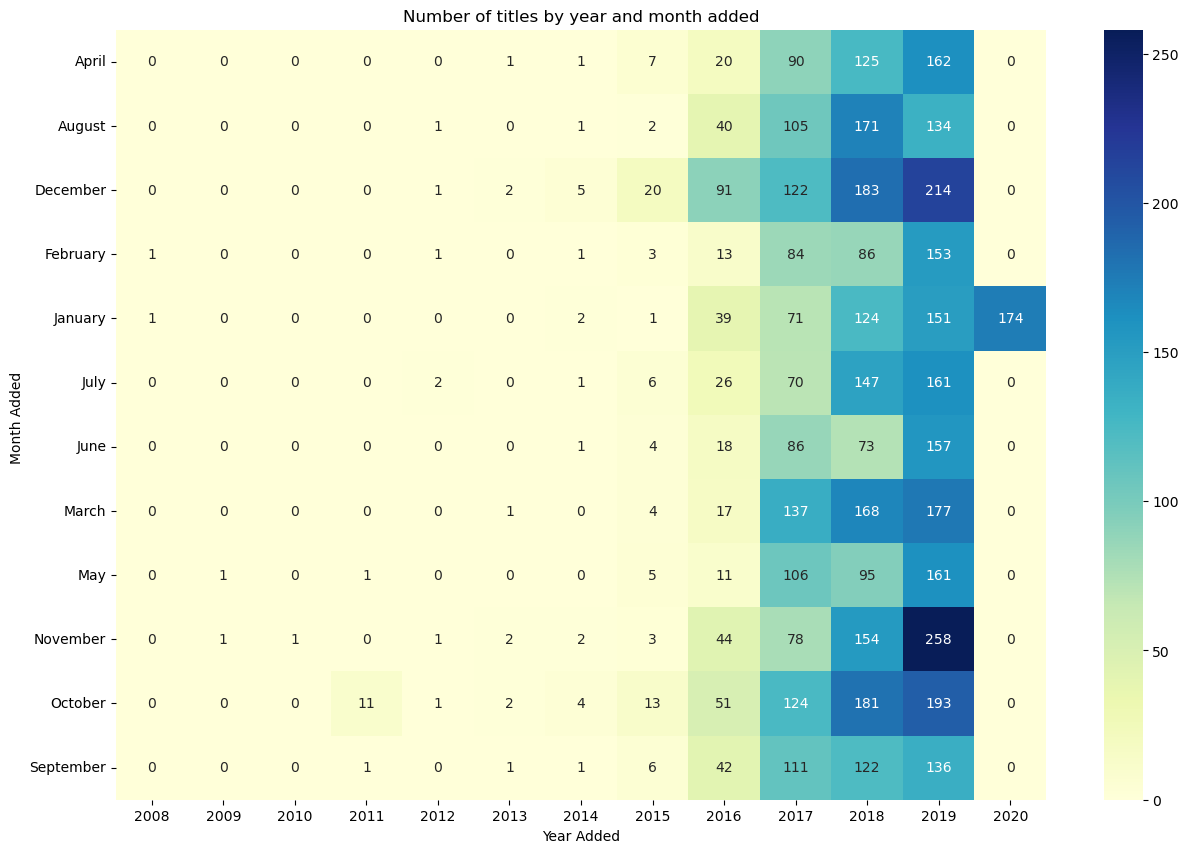

In [38]:
# Heatmap: number of titles by year and month added.
monthly_count = df['title'].groupby([ df['Month_added'],df['Year_added']]).count().unstack(fill_value=0)
plt.figure(figsize=(15,10))
sns.heatmap(monthly_count,cmap='YlGnBu',annot=True,fmt='d')
plt.title('Number of titles by year and month added')
plt.xlabel('Year Added')
plt.ylabel('Month Added ')

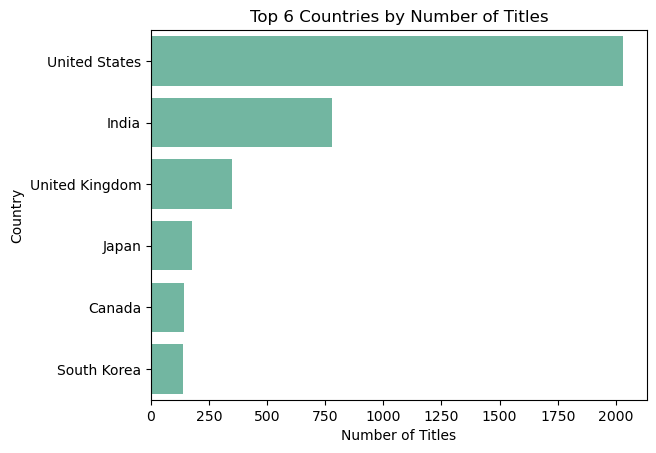

In [39]:
# Countplot: top 6 countries by number of shows
#  Get the top 6 countries
top_countries = df['country'].value_counts().head(6).index

#Filter the dataframe to include only those countries
filtered_df = df[df['country'].isin(top_countries)]

# Plot the countplot
sns.countplot(data=filtered_df, y='country', order=top_countries)
plt.title("Top 6 Countries by Number of Titles")
plt.ylabel("Country")
plt.xlabel("Number of Titles")
plt.show()



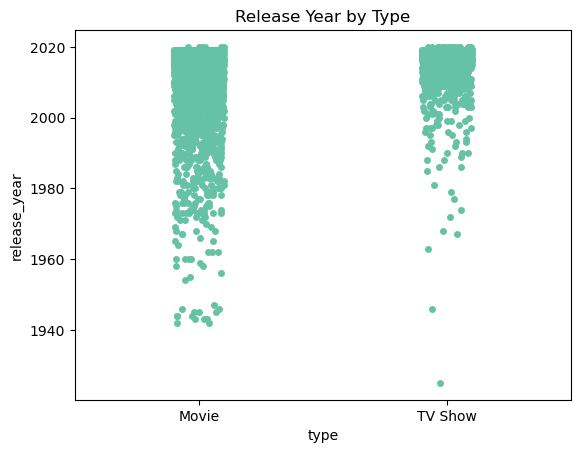

In [40]:

# Strip plot: show release year by type.
sns.stripplot(data=df, x='type', y='release_year', jitter=True)
plt.title("Release Year by Type")
plt.show()

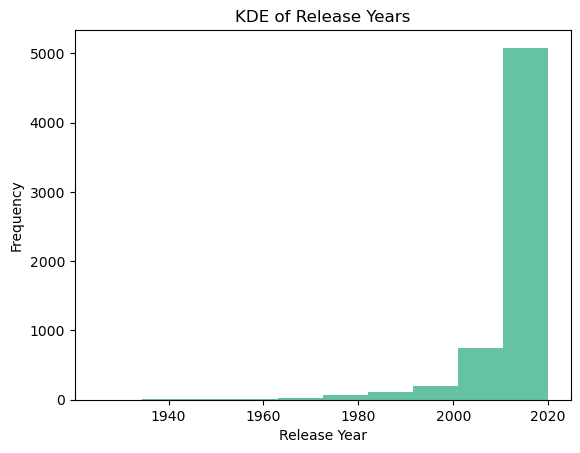

In [41]:
# Histogram of release years.
df['release_year'].plot(kind='hist', title='KDE of Release Years')
plt.xlabel("Release Year")
plt.show()

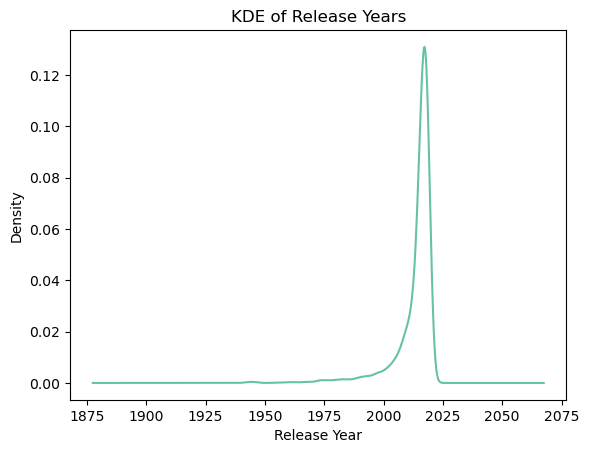

In [42]:
# KDE plot of release years.
df['release_year'].plot(kind='kde', title='KDE of Release Years')
plt.xlabel("Release Year")
plt.show()

### Advanced Filtering

In [43]:
# Filter titles containing “Love” in the title.
df[df['title'].str.contains('Love',case=False,na=False)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added,Month_added
19,80057969,Movie,Love,Gaspar Noé,"Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...","France, Belgium",2017-09-08,2015,NR,135 min,"Cult Movies, Dramas, Independent Movies",A man in an unsatisfying marriage recalls the ...,2017,September
46,81016044,Movie,Bangkok Traffic (Love) Story,Adisorn Tresirikasem,"Theeradej Wongpuapan, Sirin Horwang, Ungsumaly...",Thailand,2018-09-05,2009,TV-14,126 min,"Comedies, International Movies, Romantic Movies",After an encounter with an engineer working th...,2018,September
47,80158838,Movie,I Fine... Thank You... Love You,Mez Tharatorn,"Preechaya Pongthananikorn, Sunny Suwanmethanon...",Thailand,2018-09-05,2014,TV-14,116 min,"Comedies, International Movies, Romantic Movies",Desperate to go to the U.S. to win back his gi...,2018,September
66,81011682,TV Show,Christiane Amanpour: Sex & Love Around the World,NaN,NaN,United States,2018-09-30,2018,TV-MA,1 Season,Docuseries,"A contextual, acculturated dive into how adult...",2018,September
74,80184358,TV Show,Lovesick,NaN,"Kongyingyong Chonlathorn, Phumphothingam Nawat...",NaN,2018-09-03,2014,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Love and academics get complicated at an all-m...,2018,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5848,80174280,TV Show,Ainori Love Wagon: Asian Journey,NaN,"Becky, Audrey, Mayuko Kawakita, Shimon Okura",Japan,NaT,2018,TV-MA,2 Seasons,"International TV Shows, Reality TV, Romantic T...",Seven men and women board a pink bus in search...,<NA>,NaN
5896,80993774,TV Show,Roonpi Secret Love,NaN,"Kanyawee Songmuang, Korapat Kirdpan",Thailand,NaT,2016,TV-PG,3 Seasons,"International TV Shows, Romantic TV Shows, Tee...",High school senior Belle pursues a shy junior ...,<NA>,NaN
5941,81026700,TV Show,My First First Love,NaN,"Ji Soo, Jung Chae-yeon, Jinyoung, Choi Ri, Kan...",South Korea,NaT,2019,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Roman...","Due to various personal reasons, a group of Yu...",<NA>,NaN
6026,80041601,TV Show,Lovesick,NaN,"Johnny Flynn, Antonia Thomas, Daniel Ings, Han...",United Kingdom,NaT,2018,TV-MA,3 Seasons,"British TV Shows, International TV Shows, Roma...","In his quest for true love, Dylan found chlamy...",<NA>,NaN


In [44]:
# Filter shows added in 2021 only.

df[df['Year_added']==2021]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added,Month_added


In [45]:
# Find shows where duration is “1 Season”.

df[df['duration']=='1 Season']



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added,Month_added
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,September
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,September
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,2017-09-08,2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,2017,September
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,2017-09-08,2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",2017,September
26,80244601,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,2018-09-07,2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...,2018,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5576,80094557,TV Show,Cyborg 009 VS Devilman,NaN,"Jun Fukuyama, Shintaro Asanuma, Haruka Shirais...",Japan,2016-04-01,2015,TV-14,1 Season,"Anime Series, International TV Shows",When a Black Ghost scientist releases newly mo...,2016,April
5581,80106136,TV Show,Yo-Kai Watch,NaN,"Johnny Yong Bosch, J.W. Terry, Alicyn Packard,...",United States,2016-04-01,2015,TV-Y7,1 Season,"Anime Series, Kids' TV",Nate frees a mythical being trapped in a magic...,2016,April
5582,70259784,TV Show,DreamWorks Happy Holidays from Madagascar,NaN,"Tom McGrath, Chris Miller, Christopher Knights...",United States,2013-04-01,2005,TV-PG,1 Season,"Kids' TV, TV Comedies",Madagascar goes wild with holiday spirit in th...,2013,April
5760,80221999,TV Show,Bondi Rescue,NaN,"Andrew Günsberg, Dean Gladstone, Bruce Hopkins...",Australia,NaT,2016,TV-PG,1 Season,Reality TV,This reality series follows elite professional...,<NA>,NaN


In [46]:
# Titles from India released after 2015.
df[(df['country']=='India') &   (df['release_year'] > 2015)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added,Month_added
35,81154455,Movie,Article 15,Anubhav Sinha,"Ayushmann Khurrana, Nassar, Manoj Pahwa, Kumud...",India,2019-09-06,2019,TV-MA,125 min,"Dramas, International Movies, Thrillers",The grim realities of caste discrimination com...,2019,September
37,81052275,Movie,Ee Nagaraniki Emaindi,Tharun Bhascker,"Vishwaksen Naidu, Sushanth Reddy, Abhinav Goma...",India,2019-09-06,2018,TV-14,133 min,"Comedies, International Movies","In Goa and in desperate need of cash, four chi...",2019,September
58,81155784,Movie,Watchman,A. L. Vijay,"G.V. Prakash Kumar, Samyuktha Hegde, Suman, Ra...",India,2019-09-04,2019,TV-14,93 min,"Comedies, Dramas, International Movies","Rushing to pay off a loan shark, a young man b...",2019,September
99,80225885,TV Show,Bard of Blood,NaN,"Emraan Hashmi, Viineet Kumar, Sobhita Dhulipal...",India,2019-09-27,2019,TV-MA,1 Season,"International TV Shows, TV Action & Adventure,...","Years after a disastrous job in Balochistan, a...",2019,September
109,81177238,Movie,Malaal,Mangesh Hadawale,"Meezaan Jaffrey, Sharmin Segal, Chinmaya Surve...",India,2019-09-26,2019,TV-14,133 min,"International Movies, Romantic Movies",Class divides become thorns in the budding rom...,2019,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5533,80245329,Movie,Metro,Ananda Krishnan,"Yogi Babu, Bobby Simha, Shirish",India,2018-04-01,2016,TV-14,116 min,"Dramas, International Movies, Thrillers",Disgusted by the gold-chain snatchers in his h...,2018,April
5539,80245518,Movie,Rukh,Atanu Mukherjee,"Adarsh Gourav, Manoj Bajpayee, Smita Tambe, Ku...",India,2018-04-01,2017,TV-MA,103 min,"Dramas, Independent Movies, International Movies","Following the untimely death of his father, a ...",2018,April
5540,80124313,Movie,Sairat,Nagraj Manjule,"Rinku Rajguru, Akash Thosar, Arbaz Shaikh, Tan...",India,2018-04-01,2016,TV-14,173 min,"Dramas, International Movies, Romantic Movies",When two college students – a rich man’s daugh...,2018,April
5708,81011159,TV Show,Little Things,NaN,"Dhruv Sehgal, Mithila Palkar",India,NaT,2019,TV-MA,3 Seasons,"International TV Shows, Romantic TV Shows, TV ...",A cohabiting couple in their 20s navigate the ...,<NA>,NaN


In [47]:
# Shows with duration > 90 min (convert duration to int).

df['duration_mins'] = df['duration'].str.extract(r'(\d+)').astype(int)


df[(df['duration_mins']) > 90]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added,Month_added,duration_mins
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,September,94
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,September,99
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",2017,September,110
11,70299204,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...",2017-09-08,2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ...",2017,September,95
19,80057969,Movie,Love,Gaspar Noé,"Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...","France, Belgium",2017-09-08,2015,NR,135 min,"Cult Movies, Dramas, Independent Movies",A man in an unsatisfying marriage recalls the ...,2017,September,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5568,80158479,Movie,Salaakhen,A. Salaam,"Shashi Kapoor, Sulakshana Pandit, Mehmood, Sud...",India,2017-04-01,1975,TV-14,134 min,"Action & Adventure, International Movies, Musi...",Two close childhood friends take drastically d...,2017,April,134
5572,80097468,Movie,The Bad Kids,"Keith Fulton, Louis Pepe",NaN,United States,2017-04-01,2016,TV-MA,101 min,Documentaries,"In this documentary, teachers at a Mojave Dese...",2017,April,101
5575,80093107,Movie,Toro,Kike Maíllo,"Mario Casas, Luis Tosar, José Sacristán, Claud...",Spain,2017-04-01,2016,NR,106 min,"Dramas, International Movies, Thrillers",Ex-con Toro's brother and former partner in cr...,2017,April,106
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,2016-04-01,2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...,2016,April,102


### String Ops & New Columns

In [48]:
# Split duration column into duration_value and duration_type.

df[['duration_mins','duration type']]=df['duration'].str.extract(r'(\d+)\s* (\w+)')
df['duration_mins'] = pd.to_numeric(df['duration_mins'], errors='coerce')
df[['duration_mins', 'duration_type']]

KeyError: "['duration_type'] not in index"

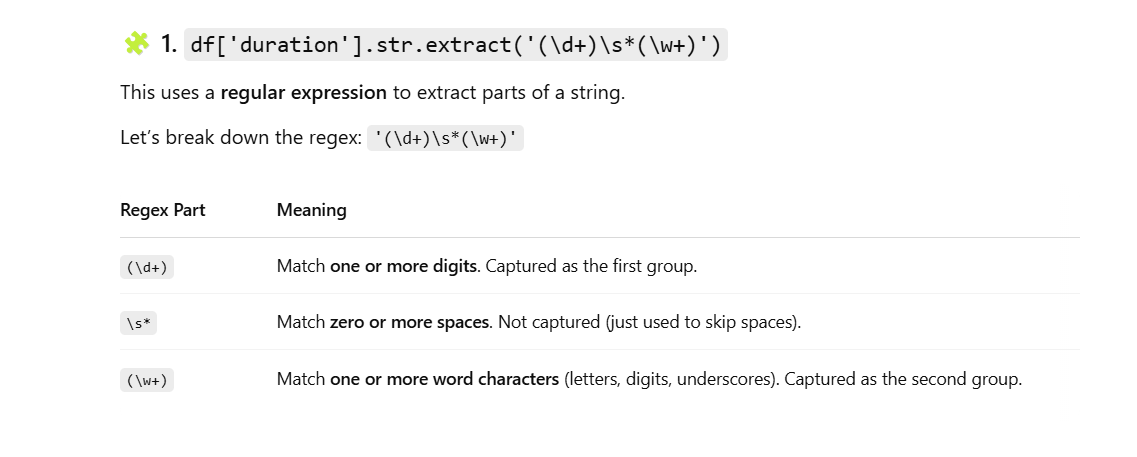

In [ ]:
# Create a new column: Is it a movie longer than 2 hours?

df['long_movie']=(df['duration_mins']> 120) & (df['type']=='Movie')

df[df['long_movie']].sample(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added,Month_added,duration_mins,duration type,duration_value,duration_type,long_movie
4504,70110883,Movie,Rock On!!,Abhishek Kapoor,"Farhan Akhtar, Arjun Rampal, Purab Kohli, Luke...",India,2019-12-15,2008,TV-14,139 min,"Dramas, International Movies, Music & Musicals",Four friends hoped that their rock band would ...,2019,December,139,min,139,min,True
734,81019031,Movie,Soorma,Shaad Ali,"Diljit Dosanjh, Tapsee Pannu, Angad Bedi, Kulb...",India,2018-10-13,2018,TV-14,131 min,"Dramas, International Movies, Sports Movies",This biopic on former Indian field hockey play...,2018,October,131,min,131,min,True
631,80239666,Movie,Illang: The Wolf Brigade,Kim Jee-woon,"Gang Dong-won, Han Hyo-joo, Jung Woo-sung, Kim...",South Korea,2018-10-19,2018,TV-MA,140 min,"Action & Adventure, International Movies, Sci-...","In 2029, the elite police squad Illang combats...",2018,October,140,min,140,min,True


In [ ]:
# Extract the first genre from the listed_in column.
df['main_genre'] = df['listed_in'].str.split(',').str[0]


In [ ]:
# Count how many movies are of type “Horror”.

df[df['listed_in'].str.contains("Horror", na=False,case=False) & (df['type'] == 'Movie')].shape[0]

262

In [ ]:
# Find most common duration for TV Shows.
df[df['type']=='TV Show']['duration'].value_counts().idxmax()

'1 Season'

### Top Insights

In [ ]:
# Which country produces the most Netflix content?
df['country'].value_counts().idxmax()

'United States'

In [ ]:
# What is the most active year for new content added?
df['Year_added'].value_counts().idxmax()

2019

In [ ]:
# Who is the most common director on Netflix?
df['director'].value_counts().idxmax()

'Raúl Campos, Jan Suter'

In [ ]:

# What is the longest movie available?
df[df['type'] == 'Movie'].sort_values(by='duration_mins', ascending=False).head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added,Month_added,duration_mins,duration type,duration_value,duration_type,long_movie,main_genre
4315,80988062,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018,December,312,min,312,min,True,Dramas


In [ ]:

# What is the shortest TV series?
df[df['type'] == 'TV Show'].sort_values(by='duration_value').head(1)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added,Month_added,duration_mins,duration type,duration_value,duration_type,long_movie,main_genre
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,September,1,Season,1,Season,False,Kids' TV


### Grouping

In [49]:
# Group by country to get the mean release year of shows.

df.groupby('country')['release_year'].mean()

country
Argentina                                              2015.447368
Argentina, Brazil, France, Poland, Germany, Denmark    2017.000000
Argentina, Chile                                       2017.000000
Argentina, Chile, Peru                                 2015.000000
Argentina, France                                      2017.000000
                                                          ...     
Uruguay, Spain, Mexico                                 2018.000000
Venezuela                                              2017.000000
Venezuela, Colombia                                    2007.000000
Vietnam                                                2016.000000
West Germany                                           1977.000000
Name: release_year, Length: 554, dtype: float64

#####  Improved Version: Mean Release Year per Individual Country

In [52]:
# Step 1: Drop missing countries
df_country_clean = df.dropna(subset=['country'])

# Step 2: Split multiple countries into individual rows
df_country_clean = df_country_clean.assign(country=df_country_clean['country'].str.split(', ')).explode('country')

# Step 3: Group by individual country and calculate mean release year
mean_release_year = df_country_clean.groupby('country')['release_year'].mean().sort_values(ascending=False)

# Display for preview
mean_release_year


country
Malawi            2019.0
Mauritius         2019.0
United States,    2018.0
Uganda            2018.0
Albania           2018.0
                   ...  
Soviet Union      1985.0
West Germany      1978.2
Poland,           1975.0
East Germany      1971.0
Liechtenstein     1965.0
Name: release_year, Length: 113, dtype: float64

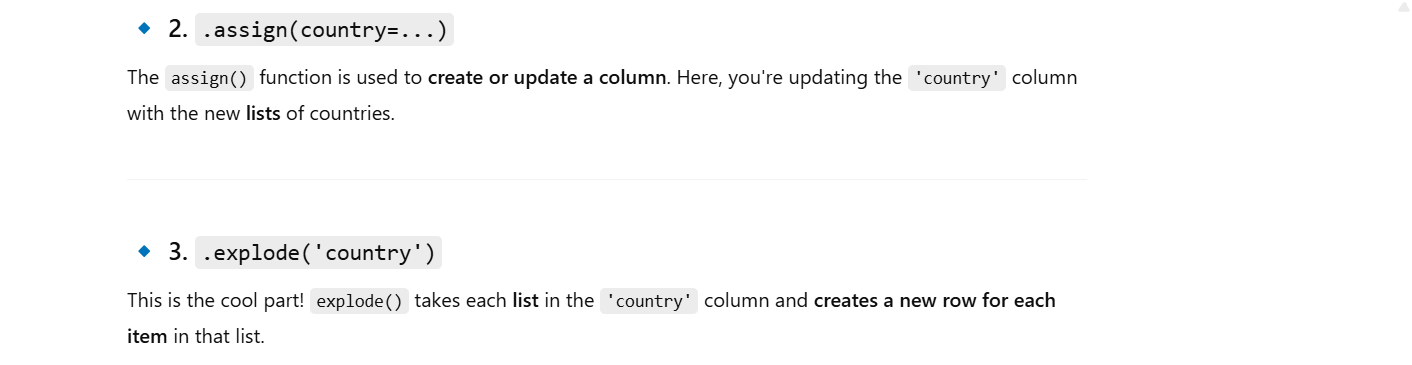

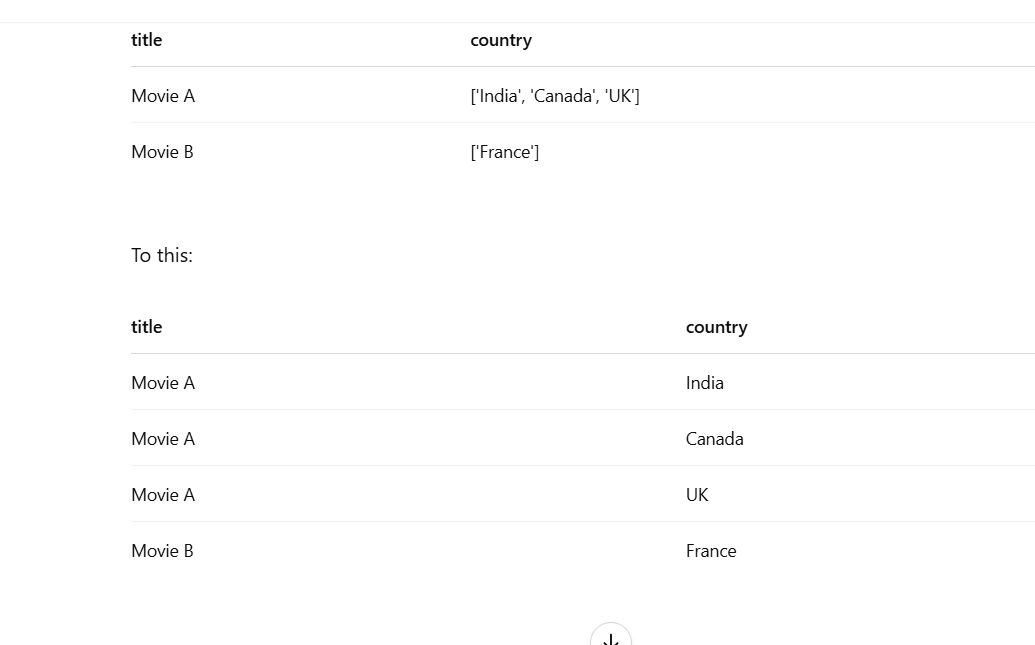

In [59]:
# Group by type to find the most common duration of Movies vs. TV Shows.

# df.groupby('type')['duration'].agg(lambda x:x.mode()[0])
df.groupby('type')['duration'].agg(lambda x:x.value_counts().idxmax())

type
Movie        90 min
TV Show    1 Season
Name: duration, dtype: object

In [61]:
# Group by Month_Added to identify release seasonality.

df['Month_added'].value_counts().sort_values()

Month_added
June         339
February     342
May          380
April        406
July         413
September    420
August       454
March        504
November     544
January      563
October      580
December     638
Name: count, dtype: int64

In [63]:
# Find the percentage of each genre in the dataset.
df_movies['main_genre'].value_counts(normalize=True) * 100

main_genre
Dramas                      25.252052
Comedies                    18.827667
Documentaries               15.099648
Action & Adventure          13.997655
Children & Family Movies     8.393904
Stand-Up Comedy              6.400938
Horror Movies                4.806565
International Movies         1.992966
Classic Movies               1.453693
Movies                       1.313013
Thrillers                    0.937866
Independent Movies           0.422040
Music & Musicals             0.281360
Anime Features               0.281360
Cult Movies                  0.234467
Sci-Fi & Fantasy             0.234467
Romantic Movies              0.046893
Sports Movies                0.023447
Name: proportion, dtype: float64

In [66]:
# Group by director and find how many unique genres each director has worked on.

df_movies.groupby('director')['main_genre'].nunique().sort_values(ascending=False)

director
Steven Spielberg                                   4
Jeremy Saulnier                                    4
Charles Stone III                                  3
Ashutosh Gowariker                                 3
Rohit Jugraj                                       3
                                                  ..
Hideaki Anno, Kazuya Tsurumaki                     1
Hidetaka Inazuka                                   1
Hiromasa Yonebayashi                               1
Hiroshi Aoyama, Kazumi Fukushima, Jim Stenstrum    1
Şenol Sönmez                                       1
Name: main_genre, Length: 3198, dtype: int64

### Export & Summary

In [68]:
# Save the filtered DataFrame of Indian titles to a CSV file.

df[df['country']=='India'].to_csv('Indian_Movies.csv',index=False)

In [70]:
# Save the top 10 longest movies to an Excel file.
df[df['type'] == 'Movie'].sort_values(by='duration_mins', ascending=False).head(10).to_excel("top_10_longest_movies.xlsx", index=False)


In [72]:
# Export a pivot table showing the number of shows by country and type.
pivot_country_type=pd.pivot_table(df,index='country',columns='type',aggfunc='size',fill_value=0)
pivot_country_type.to_csv('pivot_shows_by_country_type.csv')

In [73]:
# Save the entire cleaned dataset as a pickle file.
df.to_pickle("cleaned_netflix_data.pkl")

In [74]:
# Read back the pickle file and check its shape.
df_loaded = pd.read_pickle("cleaned_netflix_data.pkl")
df_loaded.shape

(6234, 16)